In [2]:
%load_ext lab_black

In [8]:
from pathlib import Path

In [24]:
def shift_up(a):
    b = np.zeros_like(a)

    for x in range(len(a[0])):
        walls = 0
        spaces = 0
        stones = 0
        now_wall = False
        wall_i = -1

        for y in range(len(a)):
            # if wall
            if a[y, x] == 2:
                # if met wall, spawn all stones first and spaces second
                if not now_wall:
                    now_wall = True
                    for i in range(stones):
                        b[wall_i + 1 + i, x] = 1
                    for i in range(spaces):
                        b[wall_i + i + stones + 1, x] = 0
                    spaces = stones = 0
                walls += 1
                wall_i = y

            # if not wall
            else:
                if now_wall:
                    for i in range(walls):
                        b[wall_i - i, x] = 2
                    walls = 0
                    now_wall = False

                if a[y, x] == 0:
                    spaces += 1
                elif a[y, x] == 1:
                    stones += 1

        if now_wall:
            for i in range(walls):
                b[len(a) - i - 1, x] = 2
        if not now_wall:
            for i in range(stones):
                b[wall_i + i + 1, x] = 1
    return b


def rotate(a):
    return np.rot90(a, k=1, axes=(1, 0))


def cycle(a):
    for _ in range(4):
        a = shift_up(a)
        a = rotate(a)
    return a


def get_load(b):
    return ((b == 1).sum(axis=1) * np.arange(len(b), 0, -1)).sum()

In [47]:
import matplotlib.pyplot as plt

In [48]:
test = """O....#....
O.OO#....#
.....##...
OO.#O....O
.O.....O#.
O.#..O.#.#
..O..#O..O
.......O..
#....###..
#OO..#...."""

test = Path("data/14.txt").read_text()

s = ".O#"
a = np.array([[s.index(c) for c in list(x)] for x in test.split("\n")])

In [ ]:
shift_up(a)

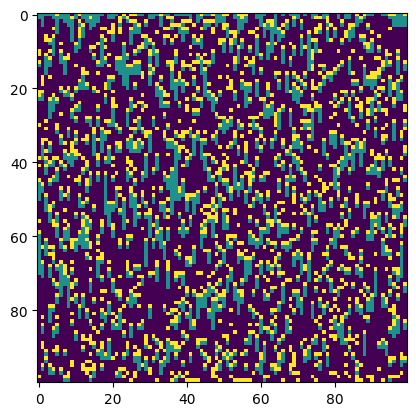

In [50]:
plt.imshow(shift_up(a))

In [ ]:
xs = []
xs.append(get_load(a))
for i in range(1, 250):
    a = cycle(a)
    xs.append(get_load(a))

# for i, x in enumerate(xs):
#     if x == xs[65]:
#         print(i, x)

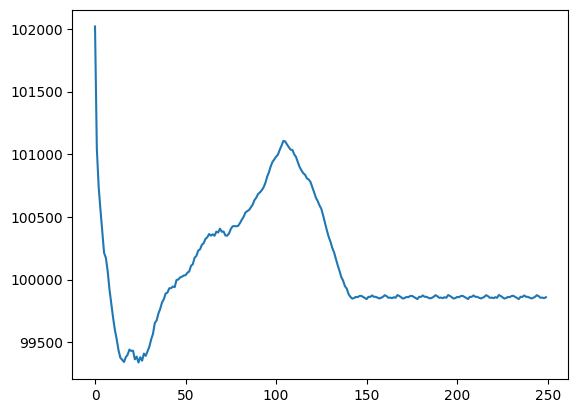

In [38]:
plt.plot(xs[150:])
# plt.axvline(x=21, c="k", ls="--")
# plt.axvline(x=49, c="k", ls="--")
# plt.axvline(x=49 + 28, c="k", ls="--")
plt.show()

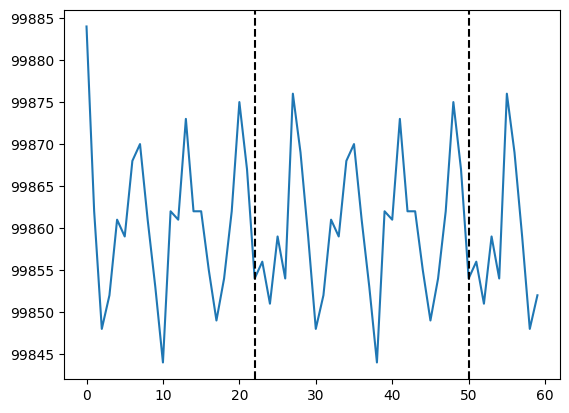

In [45]:
plt.plot(xs[140:200])
plt.axvline(x=22, c="k", ls="--")
plt.axvline(x=50, c="k", ls="--")
# plt.axvline(x=49 + 28, c="k", ls="--")
plt.show()

In [52]:
1000000000 - 35714280 * 28

160

In [53]:
xs[160]

99875